In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

In [ ]:
import seaborn as sms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier;
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,roc_curve, auc;
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


In [ ]:
def solvesvc(kernelvalue,testsize,X,y,arr,acc_score):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testsize, random_state = 0)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  classifier = SVC(kernel = kernelvalue, random_state = 0, probability=True)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  y_score = classifier.predict_proba(X_test)
  print("\n")
  print("Test size",testsize);
  sms.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d');
  plt.show();
  print("accuracy_score",accuracy_score(y_test, y_pred))
  arr.append(testsize/100);
  acc_score.append(accuracy_score(y_test,y_pred));
  print("precision_score",precision_score(y_test,y_pred,average='macro'))
  print("recall_score",recall_score(y_test,y_pred,average='macro'))
  print("f1_score",f1_score(y_test, y_pred, average='macro'))
  classes = np.unique(y)
  y_test_bin = label_binarize(y_test, classes=classes)
  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(8, 6))

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')  # random line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multiclass ROC Curve')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()



Test size 20


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


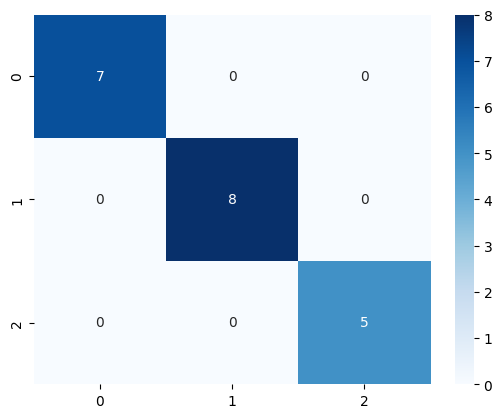

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


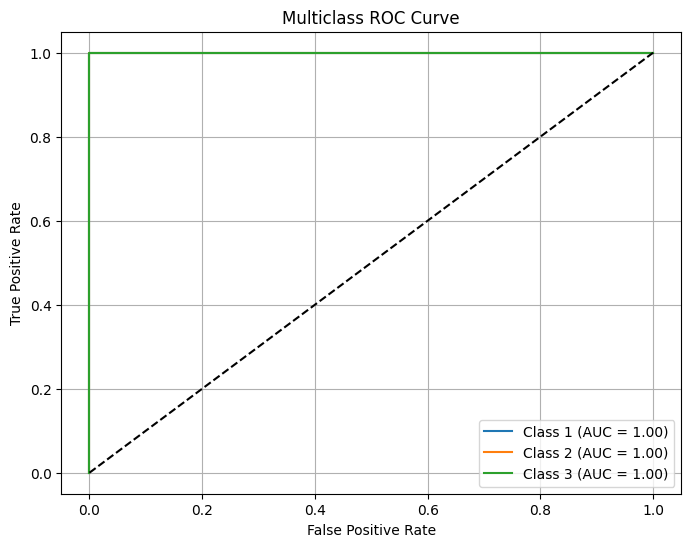



Test size 30


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


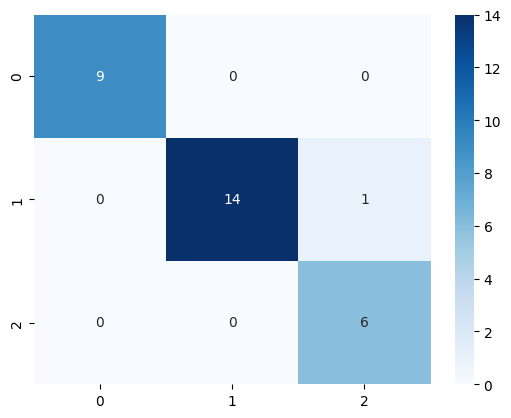

accuracy_score 0.9666666666666667
precision_score 0.9523809523809524
recall_score 0.9777777777777779
f1_score 0.9628647214854112


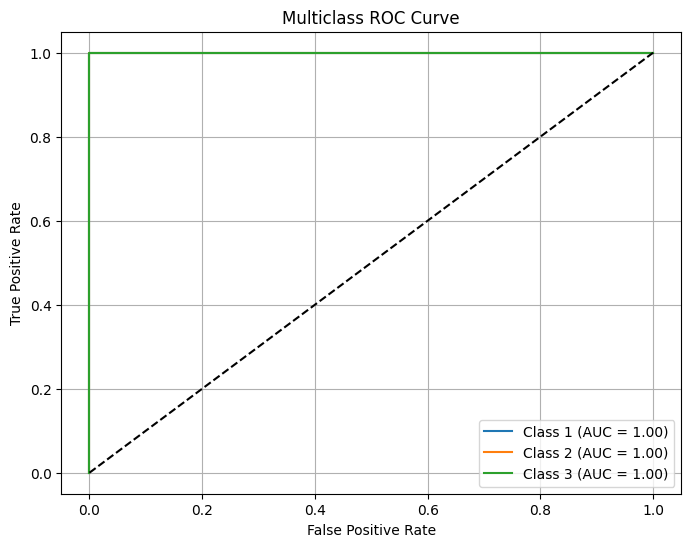



Test size 40


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


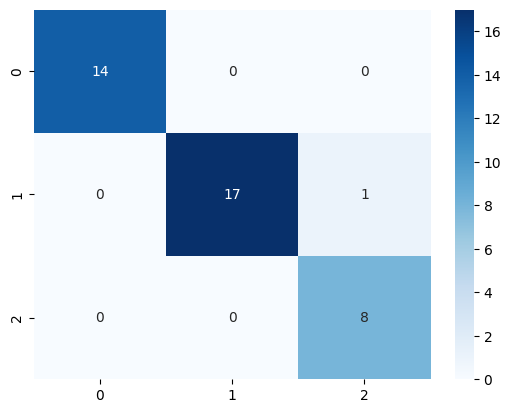

accuracy_score 0.975
precision_score 0.9629629629629629
recall_score 0.9814814814814815
f1_score 0.9708683473389357


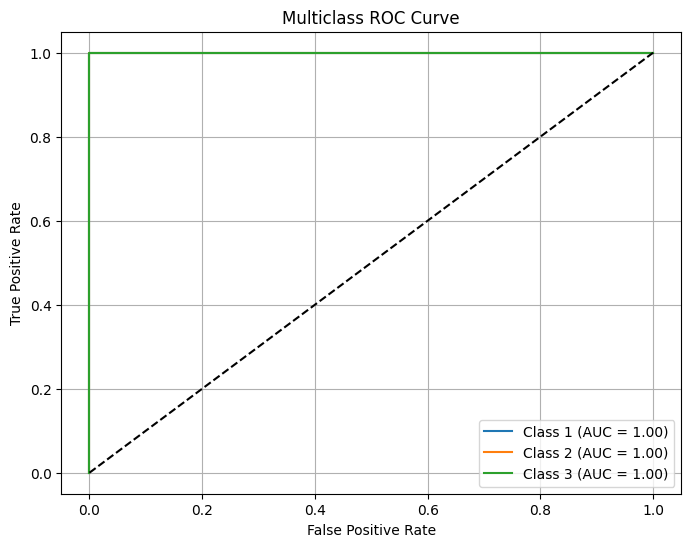



Test size 50


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


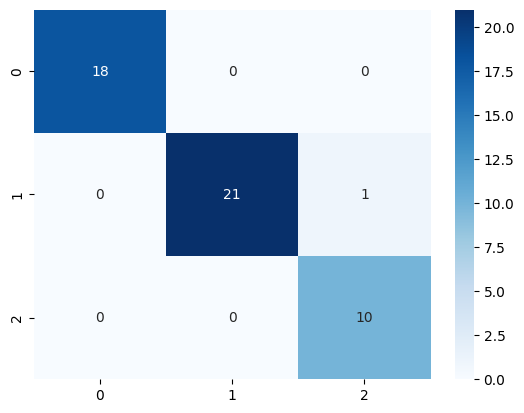

accuracy_score 0.98
precision_score 0.9696969696969697
recall_score 0.9848484848484849
f1_score 0.976375046142488


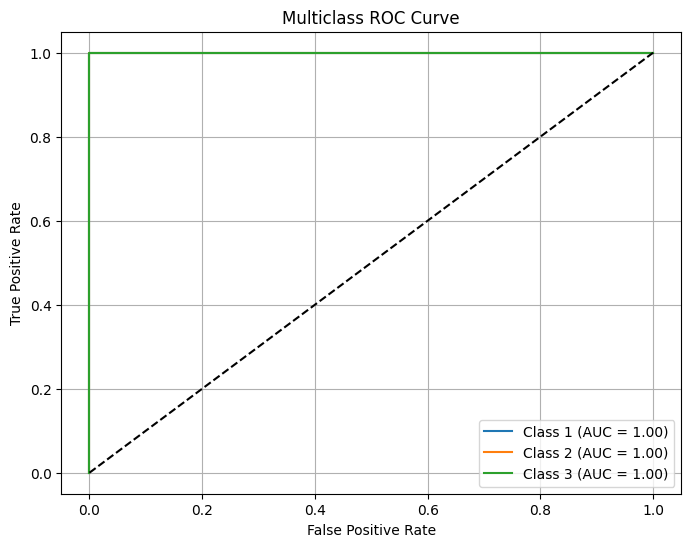

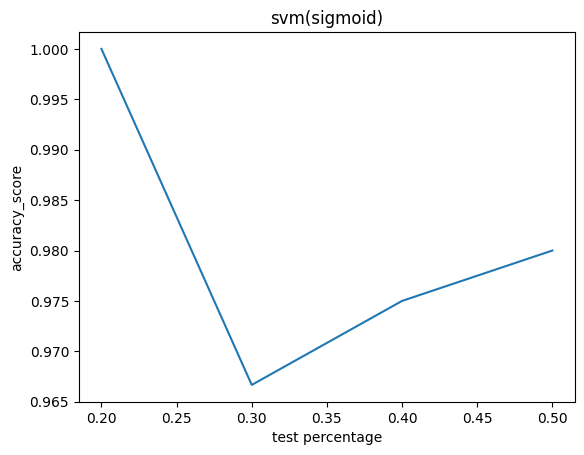

In [ ]:
testsize=[];
acc_score=[];
for i in range (2,6):
  solvesvc('sigmoid',i*10,X,y,testsize,acc_score)#put kernelvalue=poly,rbf,linear,sigmoid

plt.plot(testsize,acc_score);
plt.title('svm(sigmoid)');
plt.xlabel('test percentage');
plt.ylabel('accuracy_score');


In [ ]:
def solvesvcpca(kernelvalue,testsize,X,y,arr,acc_score):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testsize, random_state = 0)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  pca = PCA(n_components = 2)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  classifier = SVC(kernel = kernelvalue, random_state = 0, probability=True)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  y_score = classifier.predict_proba(X_test)
  print("\n")
  print("Test size",testsize);
  sms.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d');
  plt.show();
  print("accuracy_score",accuracy_score(y_test, y_pred))
  arr.append(testsize/100);
  acc_score.append(accuracy_score(y_test,y_pred));
  print("precision_score",precision_score(y_test,y_pred,average='macro'))
  print("recall_score",recall_score(y_test,y_pred,average='macro'))
  print("f1_score",f1_score(y_test, y_pred, average='macro'))
  classes = np.unique(y)
  y_test_bin = label_binarize(y_test, classes=classes)
  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(8, 6))

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')  # random line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multiclass ROC Curve')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()



Test size 20


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


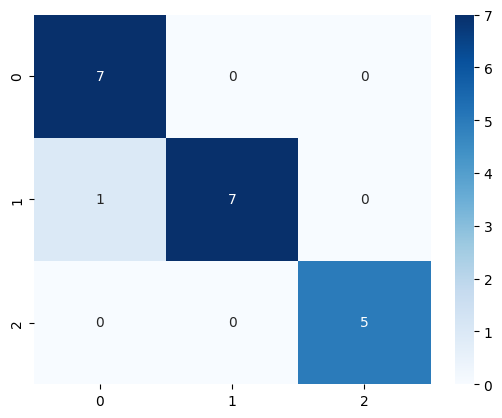

accuracy_score 0.95
precision_score 0.9583333333333334
recall_score 0.9583333333333334
f1_score 0.9555555555555556


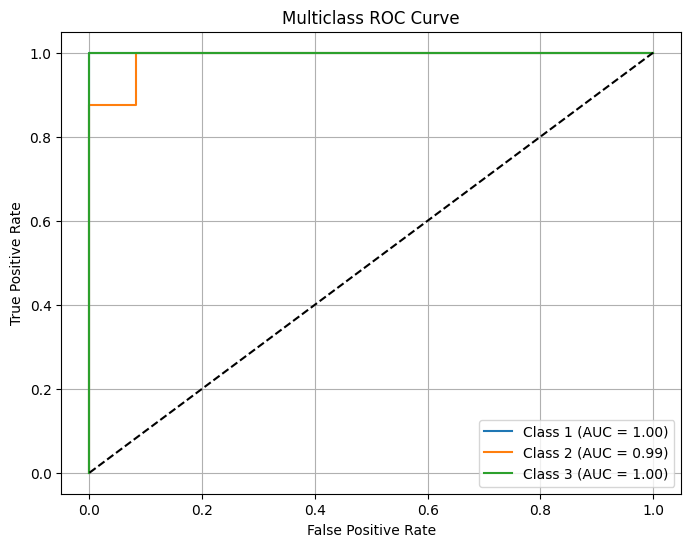



Test size 30


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


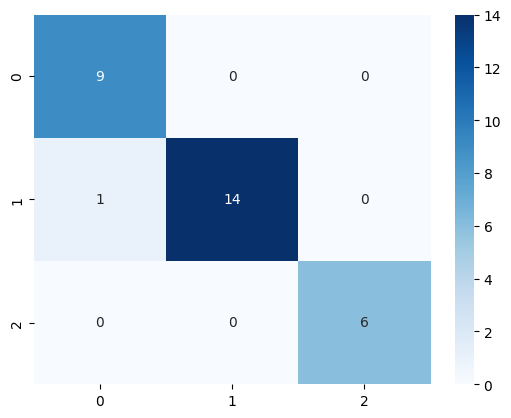

accuracy_score 0.9666666666666667
precision_score 0.9666666666666667
recall_score 0.9777777777777779
f1_score 0.9709618874773139


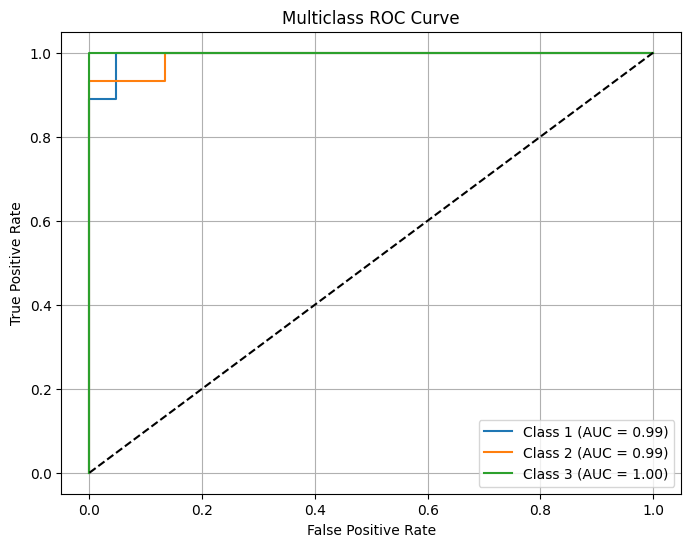



Test size 40


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


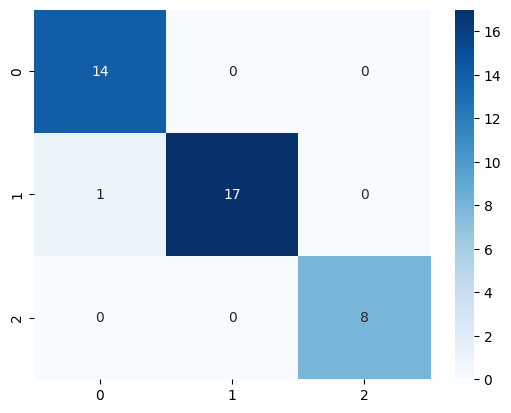

accuracy_score 0.975
precision_score 0.9777777777777779
recall_score 0.9814814814814815
f1_score 0.9789819376026273


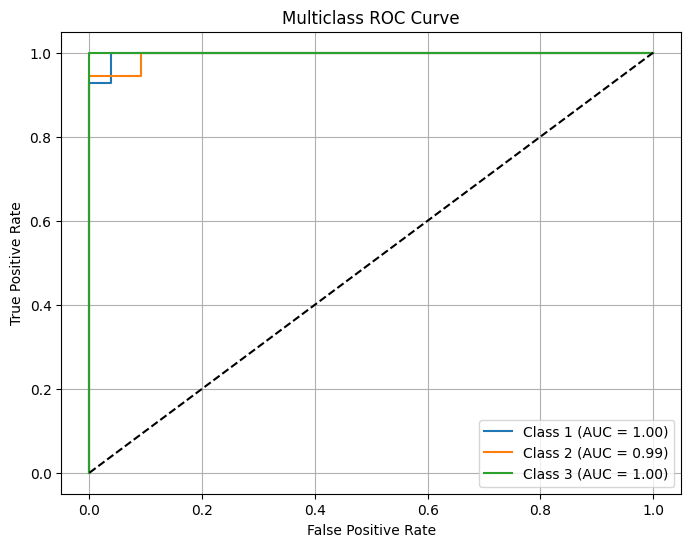



Test size 50


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


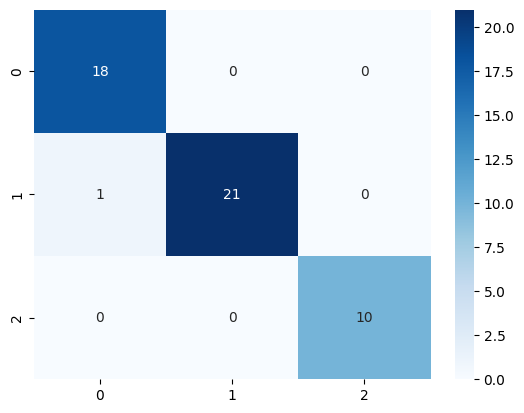

accuracy_score 0.98
precision_score 0.9824561403508771
recall_score 0.9848484848484849
f1_score 0.9832390530064948


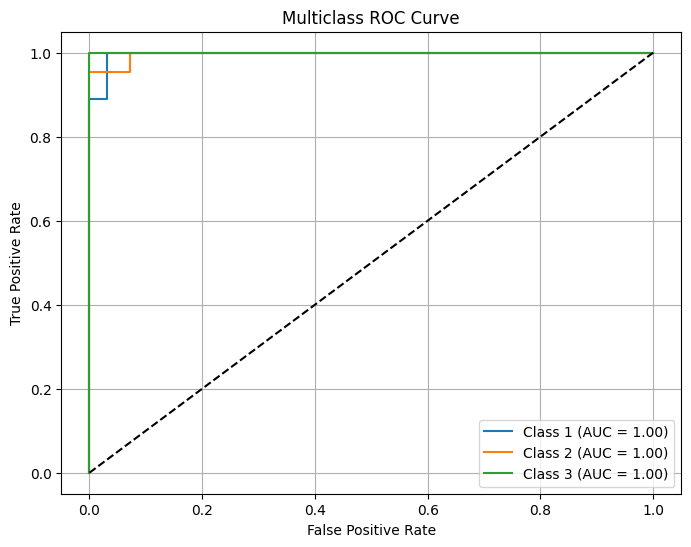

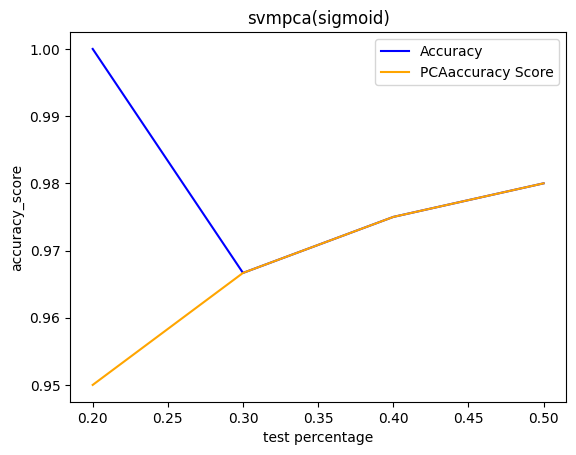

In [ ]:
testsize=[];
arr_score=[];
for i in range (2,6):
  solvesvcpca('sigmoid',i*10,X,y,testsize,arr_score)#put kernelvalue=poly,rbf,linear,sigmoid

plt.plot(testsize, acc_score, label="Accuracy", color="blue")
plt.plot(testsize, arr_score, label="PCAaccuracy Score", color="orange")
plt.title('svmpca(sigmoid)');
plt.xlabel('test percentage');
plt.ylabel('accuracy_score');
plt.legend()

In [ ]:
def solverandomforest(testsize,X,y,arr,acc_score):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testsize, random_state = 0)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0);
  classifier.fit(X_train,y_train)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  y_score = classifier.predict_proba(X_test)
  print("\n")
  print("Test size",testsize);
  sms.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d');
  plt.show();
  print("accuracy_score",accuracy_score(y_test, y_pred))
  arr.append(testsize/100);
  acc_score.append(accuracy_score(y_test,y_pred));
  print("precision_score",precision_score(y_test,y_pred,average='macro'))
  print("recall_score",recall_score(y_test,y_pred,average='macro'))
  print("f1_score",f1_score(y_test, y_pred, average='macro'))
  classes = np.unique(y)
  y_test_bin = label_binarize(y_test, classes=classes)
  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(8, 6))

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')  # random line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multiclass ROC Curve')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()



Test size 20


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


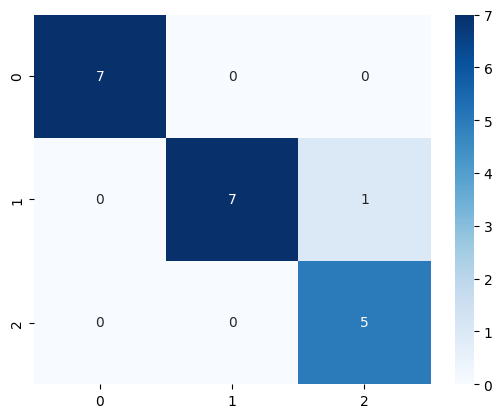

accuracy_score 0.95
precision_score 0.9444444444444445
recall_score 0.9583333333333334
f1_score 0.9474747474747475


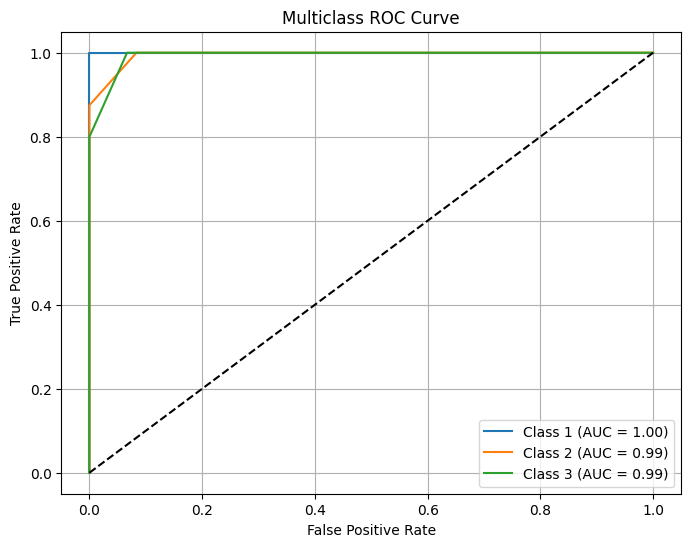



Test size 30


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


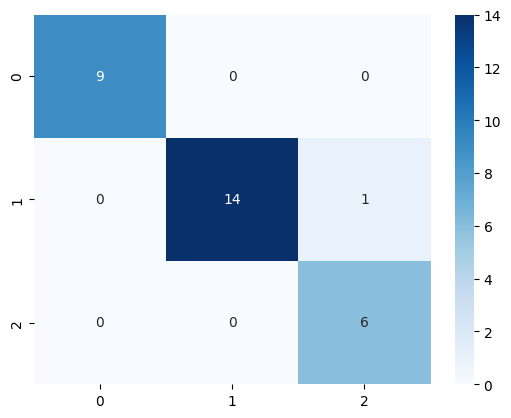

accuracy_score 0.9666666666666667
precision_score 0.9523809523809524
recall_score 0.9777777777777779
f1_score 0.9628647214854112


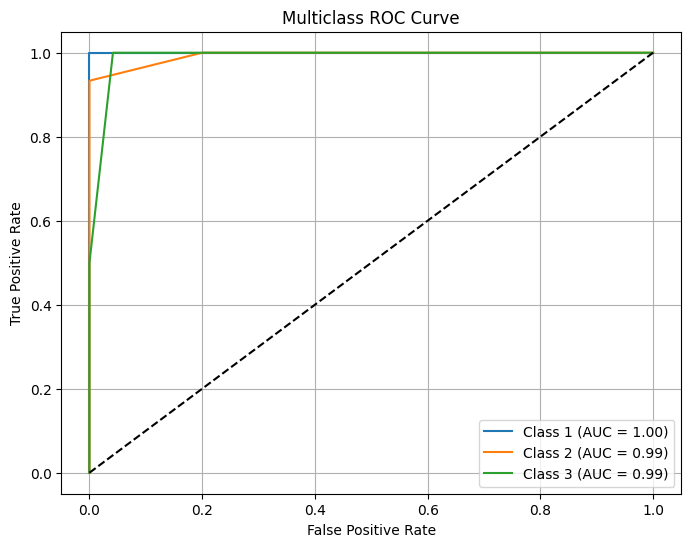



Test size 40


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


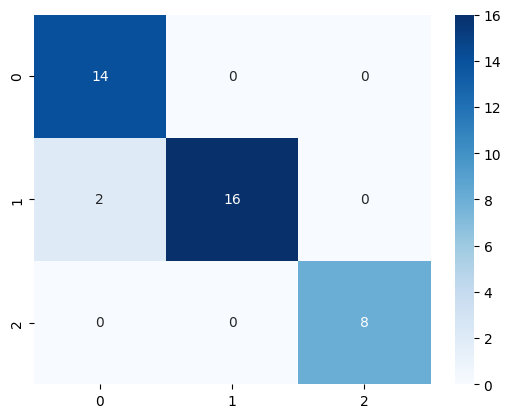

accuracy_score 0.95
precision_score 0.9583333333333334
recall_score 0.9629629629629629
f1_score 0.9581699346405229


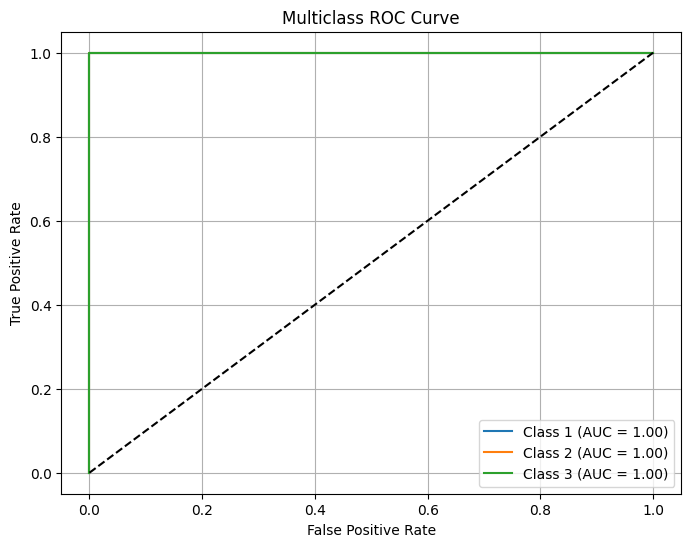

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)




Test size 50


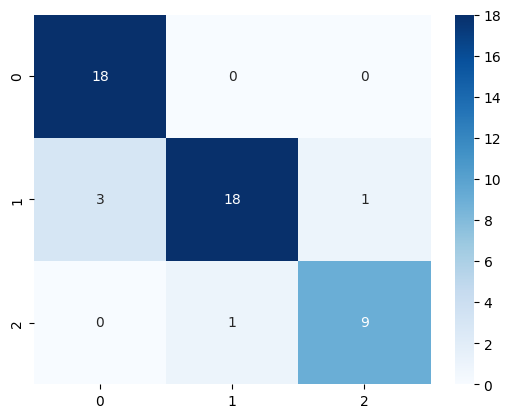

accuracy_score 0.9
precision_score 0.9015037593984961
recall_score 0.9060606060606061
f1_score 0.900375234521576


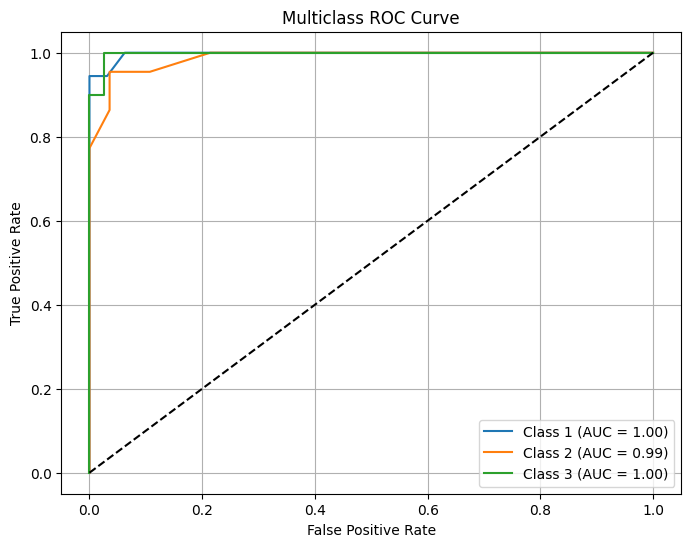

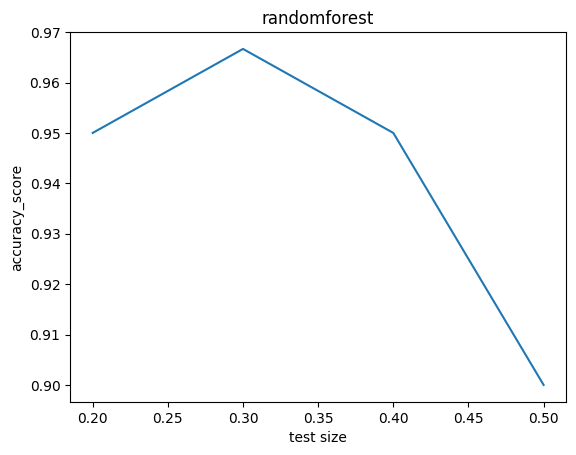

In [ ]:
testsize=[];
acc_score=[];
for i in range (2,6):
  solverandomforest(i*10,X,y,testsize,acc_score)#criterion=entropy
plt.plot(testsize,acc_score);
plt.title('randomforest');
plt.xlabel('test size');
plt.ylabel('accuracy_score');

In [ ]:
def solverandomforestpca(testsize,X,y,arr,acc_score):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testsize, random_state = 0)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  pca = PCA(n_components = 2)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0);
  classifier.fit(X_train,y_train)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  y_score = classifier.predict_proba(X_test)
  print("\n")
  print("Test size",testsize);
  sms.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d');
  plt.show();
  print("accuracy_score",accuracy_score(y_test, y_pred))
  arr.append(testsize/100);
  acc_score.append(accuracy_score(y_test,y_pred));
  print("precision_score",precision_score(y_test,y_pred,average='macro'))
  print("recall_score",recall_score(y_test,y_pred,average='macro'))
  print("f1_score",f1_score(y_test, y_pred, average='macro'))
  classes = np.unique(y)
  y_test_bin = label_binarize(y_test, classes=classes)
  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(8, 6))

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')  # random line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multiclass ROC Curve')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)




Test size 20


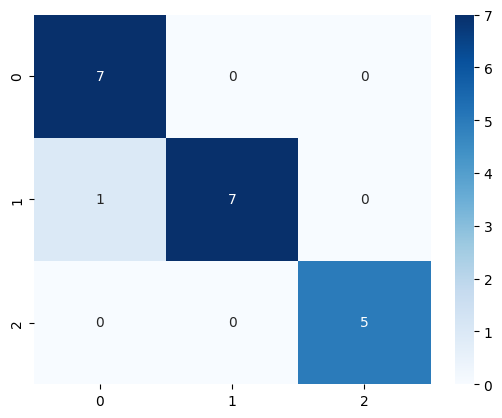

accuracy_score 0.95
precision_score 0.9583333333333334
recall_score 0.9583333333333334
f1_score 0.9555555555555556


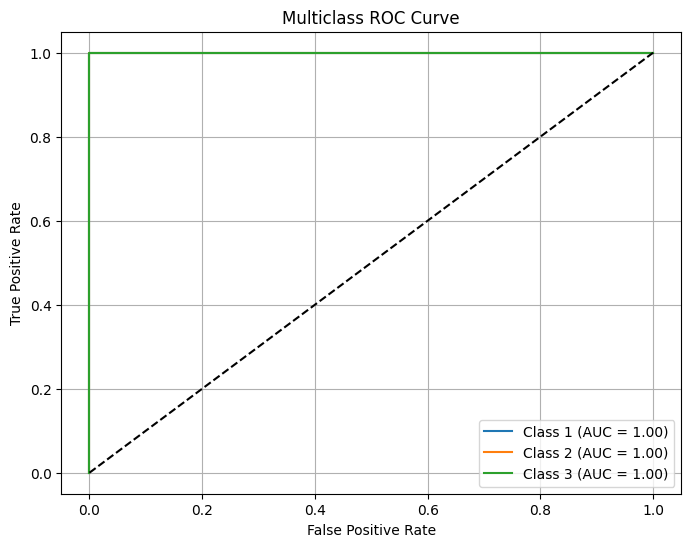



Test size 30


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


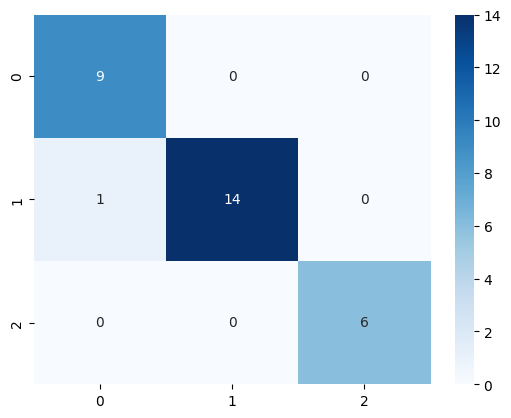

accuracy_score 0.9666666666666667
precision_score 0.9666666666666667
recall_score 0.9777777777777779
f1_score 0.9709618874773139


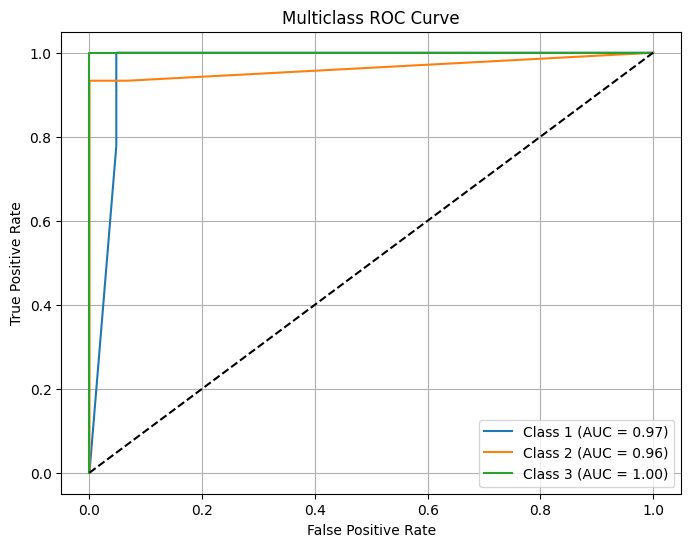



Test size 40


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


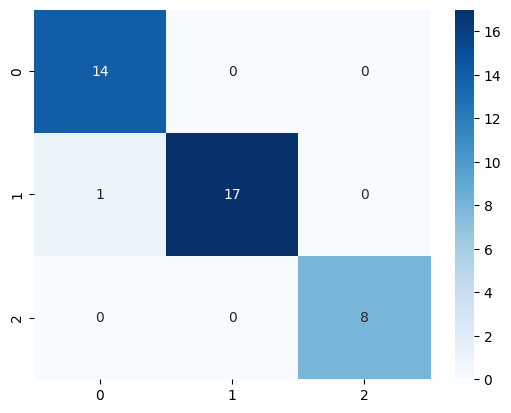

accuracy_score 0.975
precision_score 0.9777777777777779
recall_score 0.9814814814814815
f1_score 0.9789819376026273


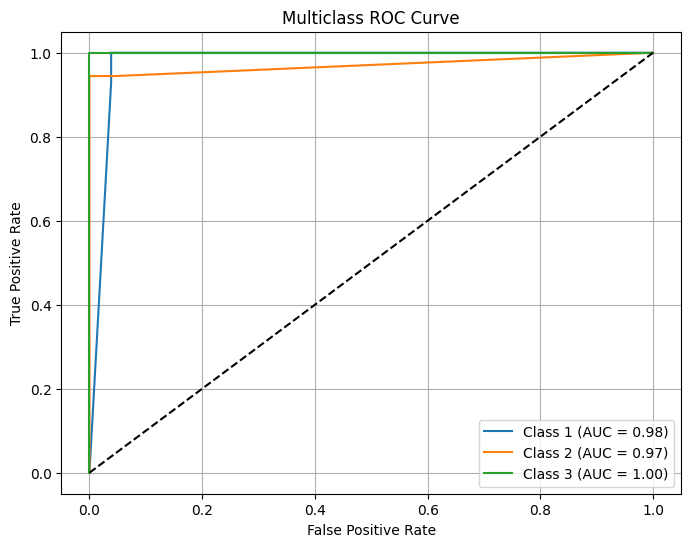



Test size 50


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


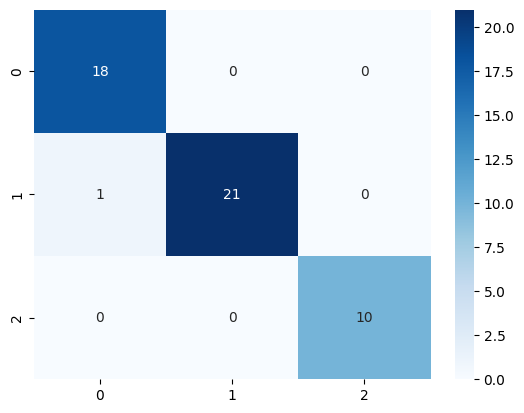

accuracy_score 0.98
precision_score 0.9824561403508771
recall_score 0.9848484848484849
f1_score 0.9832390530064948


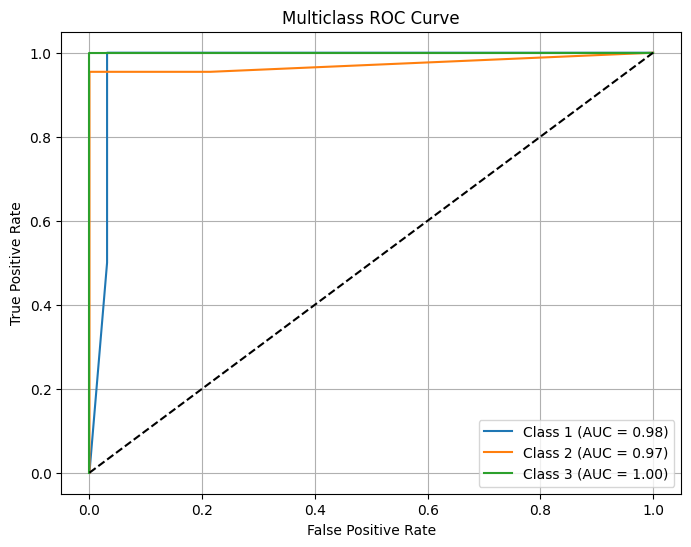

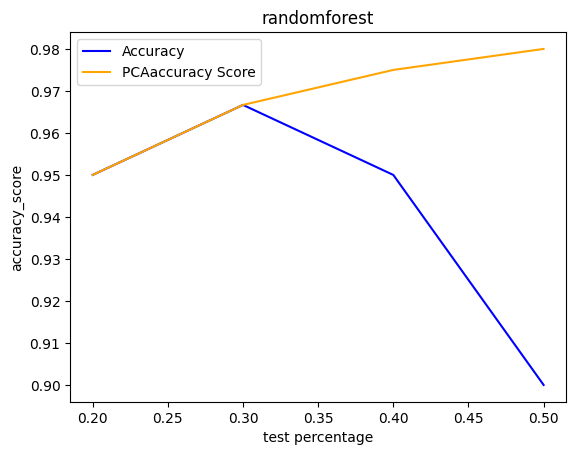

In [ ]:
testsize=[];
arr_score=[];
for i in range (2,6):
  solverandomforestpca(i*10,X,y,testsize,arr_score)#criterion=entropy
plt.plot(testsize, acc_score, label="Accuracy", color="blue")
plt.plot(testsize, arr_score, label="PCAaccuracy Score", color="orange")
plt.title('randomforest');
plt.xlabel('test percentage');
plt.ylabel('accuracy_score');
plt.legend()

In [ ]:
def solvemlpclassifier(testsize,X,y,arr,acc_score):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testsize, random_state = 0)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  classifier=MLPClassifier(learning_rate='constant',max_iter=35,momentum=0.9);
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  y_score = classifier.predict_proba(X_test)
  print("\n")
  print("Test size",testsize);
  sms.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d');
  plt.show();
  print("accuracy_score",accuracy_score(y_test, y_pred))
  arr.append(testsize/100);
  acc_score.append(accuracy_score(y_test,y_pred));
  print("precision_score",precision_score(y_test,y_pred,average='macro'))
  print("recall_score",recall_score(y_test,y_pred,average='macro'))
  print("f1_score",f1_score(y_test, y_pred, average='macro'))
  classes = np.unique(y)
  y_test_bin = label_binarize(y_test, classes=classes)
  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(8, 6))

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')  # random line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multiclass ROC Curve')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()



Test size 20


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(


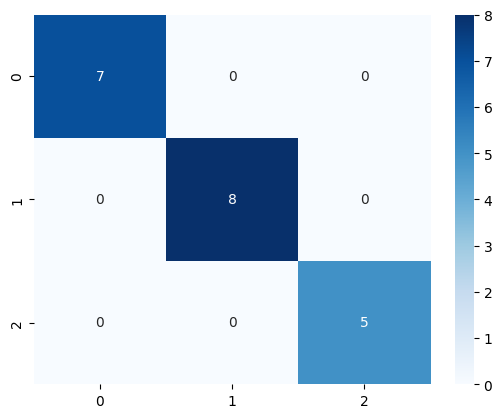

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


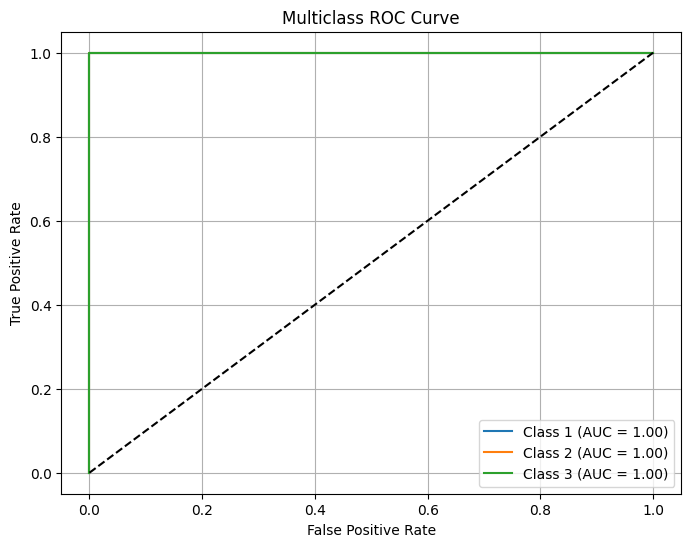



Test size 30


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(


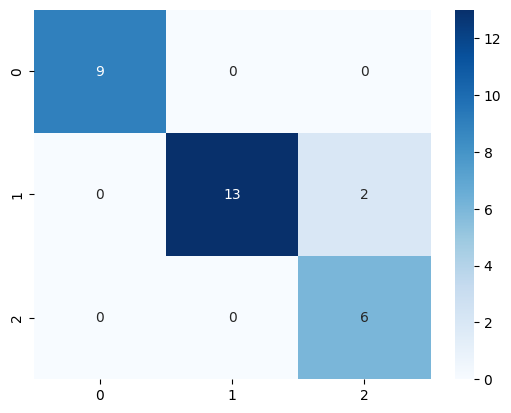

accuracy_score 0.9333333333333333
precision_score 0.9166666666666666
recall_score 0.9555555555555556
f1_score 0.9285714285714285


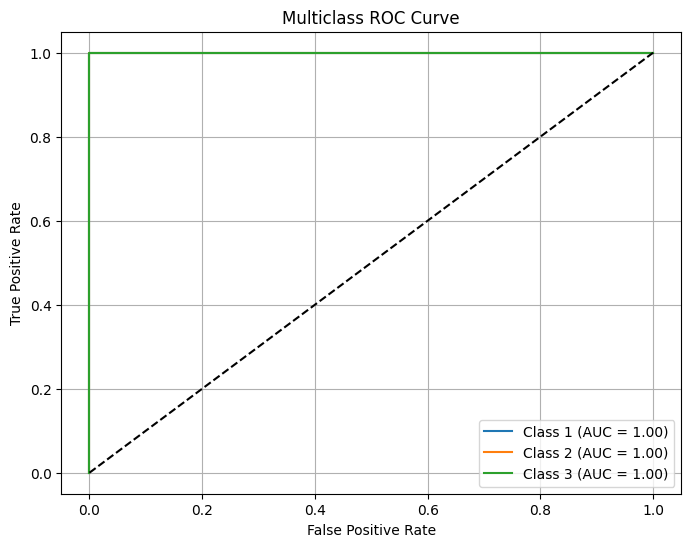



Test size 40


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(


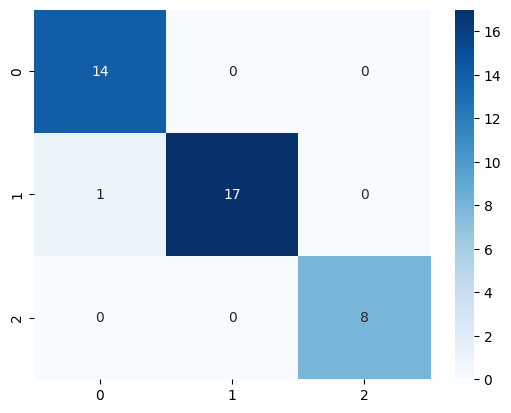

accuracy_score 0.975
precision_score 0.9777777777777779
recall_score 0.9814814814814815
f1_score 0.9789819376026273


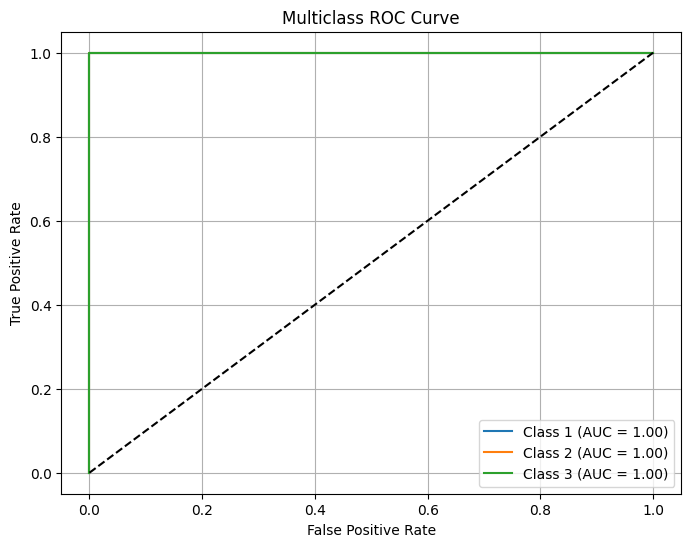

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(




Test size 50


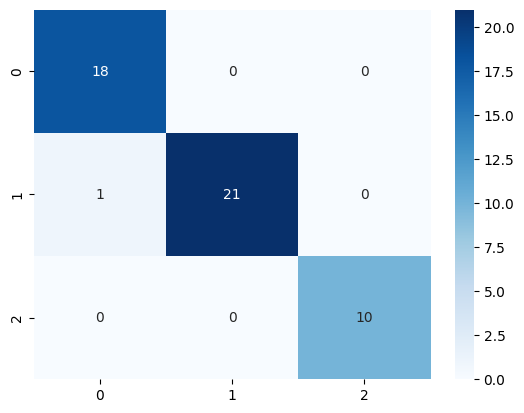

accuracy_score 0.98
precision_score 0.9824561403508771
recall_score 0.9848484848484849
f1_score 0.9832390530064948


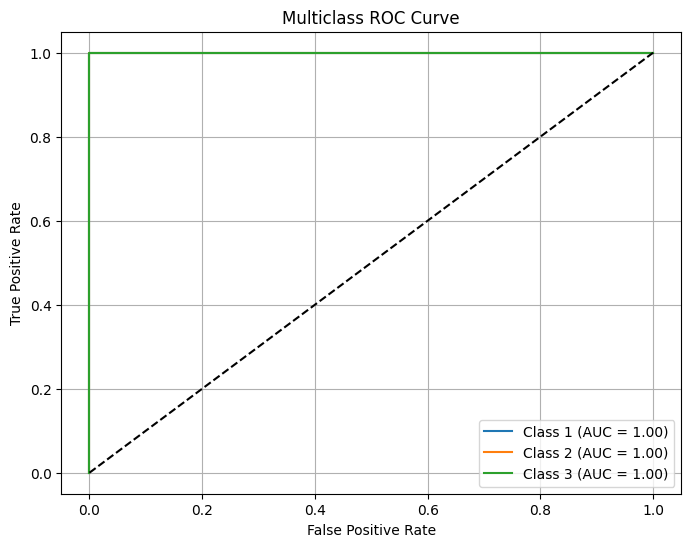

Text(0, 0.5, 'accuracy_score')

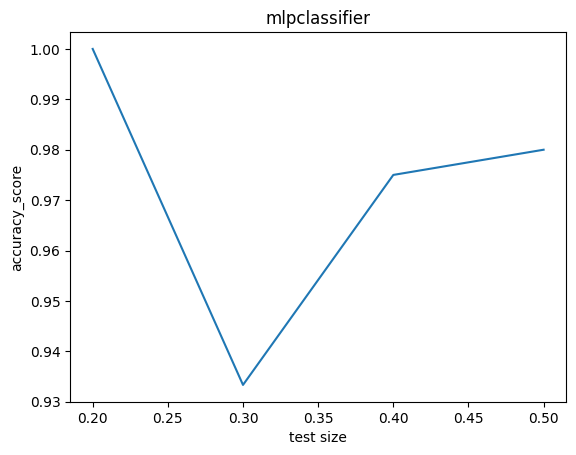

In [ ]:
testsize=[];
acc_score=[];
for i in range (2,6):
  solvemlpclassifier(i*10,X,y,testsize,acc_score);
plt.plot(testsize,acc_score);
plt.title('mlpclassifier');
plt.xlabel('test size');
plt.ylabel('accuracy_score')

In [ ]:
def solvemlpclassifierpca(testsize,X,y,arr,acc_score):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testsize, random_state = 0)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  pca = PCA(n_components = 2)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  classifier=MLPClassifier(learning_rate='constant',max_iter=35,momentum=0.9);
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  y_score = classifier.predict_proba(X_test)
  print("\n")
  print("Test size",testsize);
  sms.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d');
  plt.show();
  print("accuracy_score",accuracy_score(y_test, y_pred))
  arr.append(testsize/100);
  acc_score.append(accuracy_score(y_test,y_pred));
  print("precision_score",precision_score(y_test,y_pred,average='macro'))
  print("recall_score",recall_score(y_test,y_pred,average='macro'))
  print("f1_score",f1_score(y_test, y_pred, average='macro'))
  classes = np.unique(y)
  y_test_bin = label_binarize(y_test, classes=classes)
  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(8, 6))

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--')  # random line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multiclass ROC Curve')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(




Test size 20


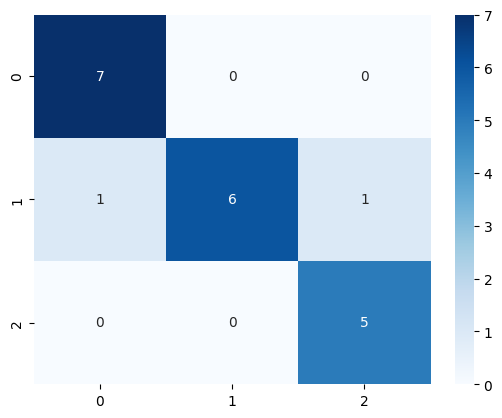

accuracy_score 0.9
precision_score 0.9027777777777778
recall_score 0.9166666666666666
f1_score 0.8998556998556998


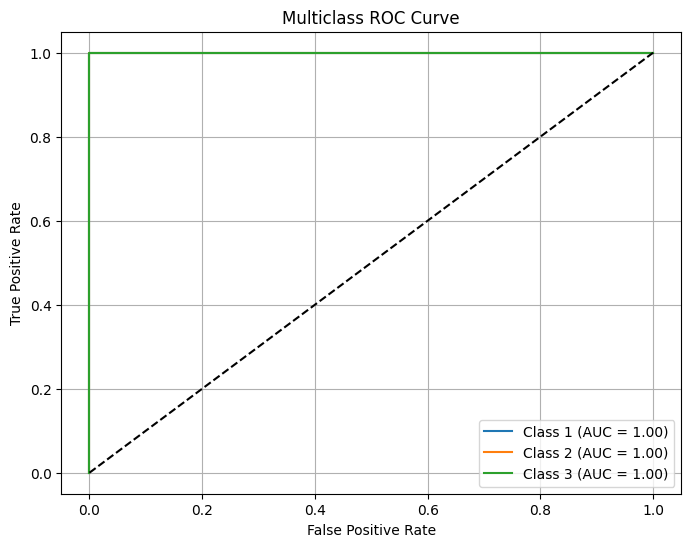

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(




Test size 30


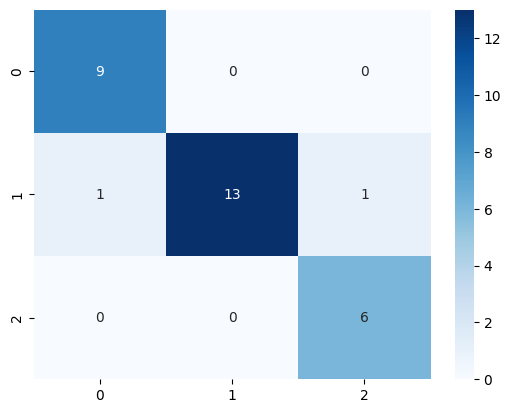

accuracy_score 0.9333333333333333
precision_score 0.919047619047619
recall_score 0.9555555555555556
f1_score 0.9330055909003278


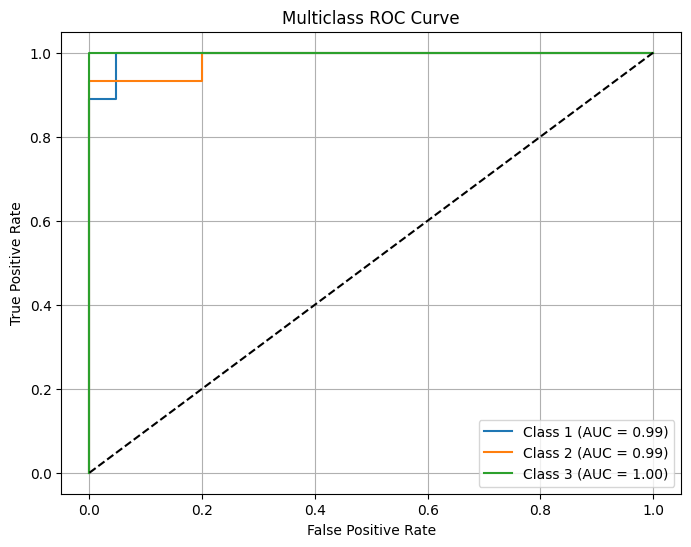

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(




Test size 40


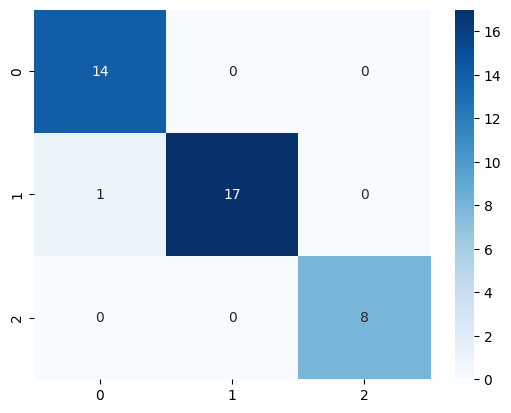

accuracy_score 0.975
precision_score 0.9777777777777779
recall_score 0.9814814814814815
f1_score 0.9789819376026273


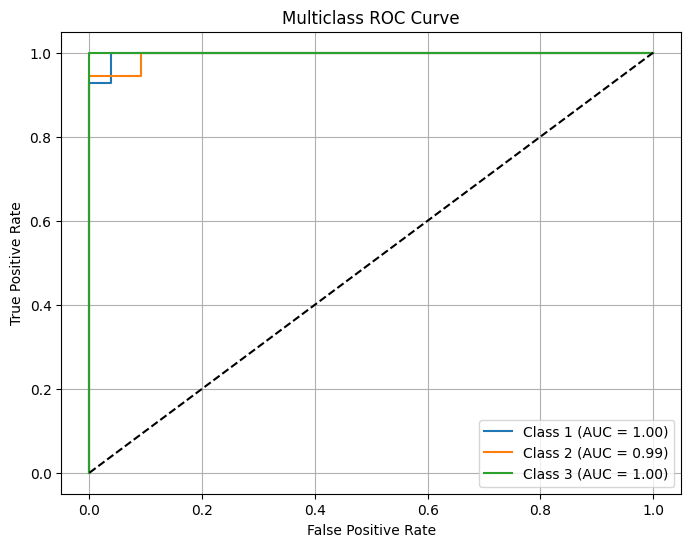



Test size 50


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(


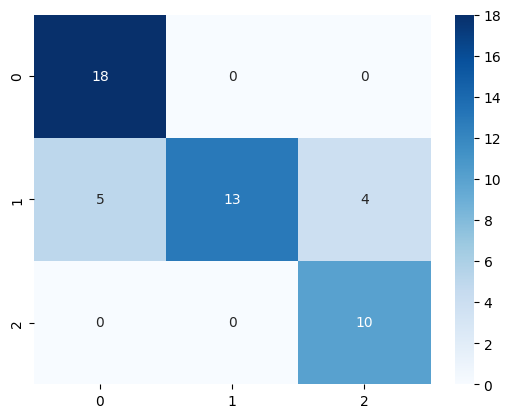

accuracy_score 0.82
precision_score 0.8322981366459627
recall_score 0.8636363636363636
f1_score 0.8180797522260937


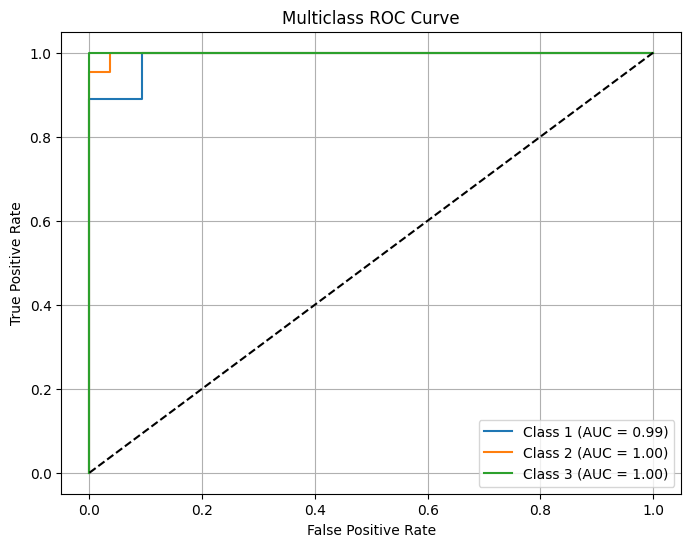

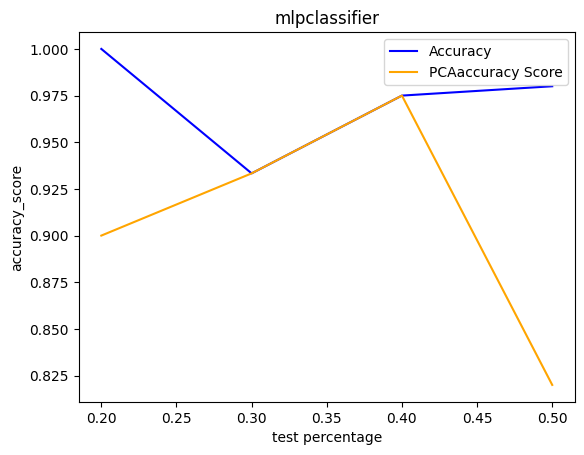

In [ ]:
testsize=[];
arr_score=[];
for i in range (2,6):
  solvemlpclassifierpca(i*10,X,y,testsize,arr_score);
plt.plot(testsize, acc_score, label="Accuracy", color="blue")
plt.plot(testsize, arr_score, label="PCAaccuracy Score", color="orange")
plt.title('mlpclassifier');
plt.xlabel('test percentage');
plt.ylabel('accuracy_score');
plt.legend()